Loading built-in Titanic dataset from Seaborn...
Data loaded successfully.
Loaded and cleaned 891 passenger records.

Data Sample (first 5 rows):
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  
Generating Plot 1: Survival Rate by Class and Sex...
Generating Plot 2: Age Distribution by Survival...

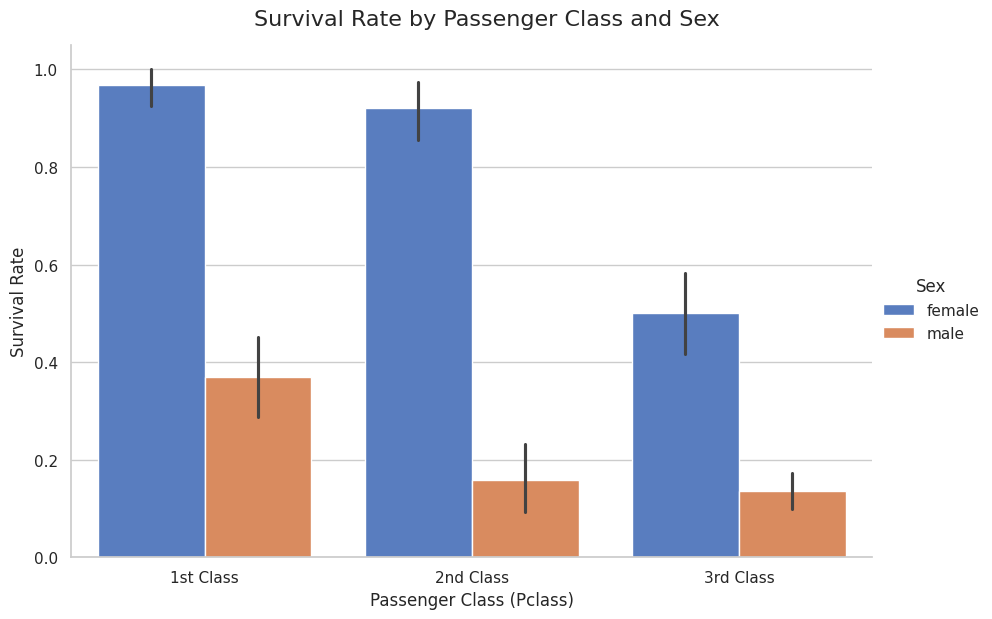

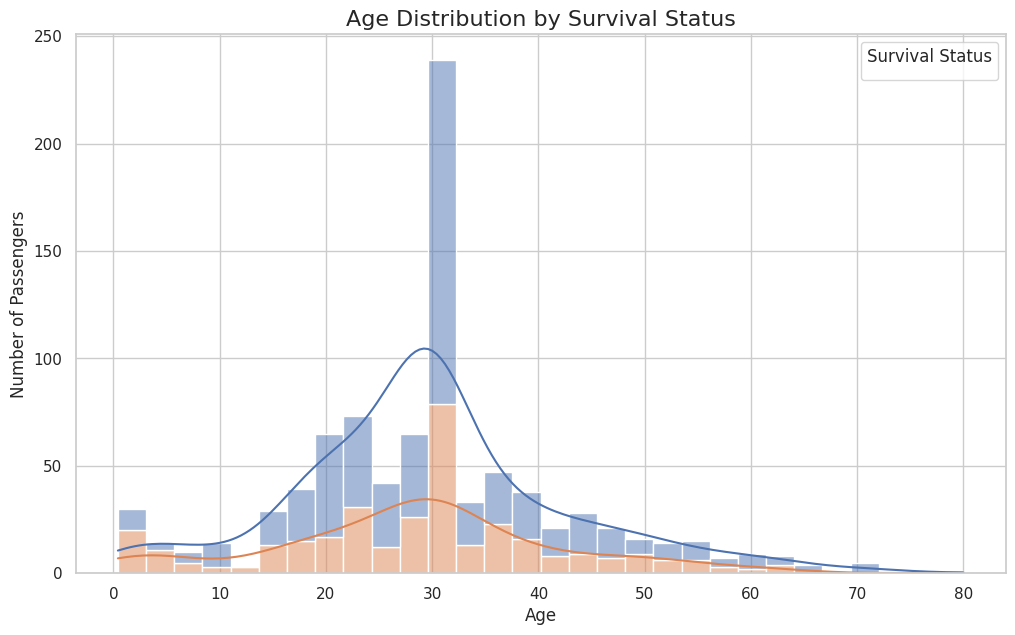

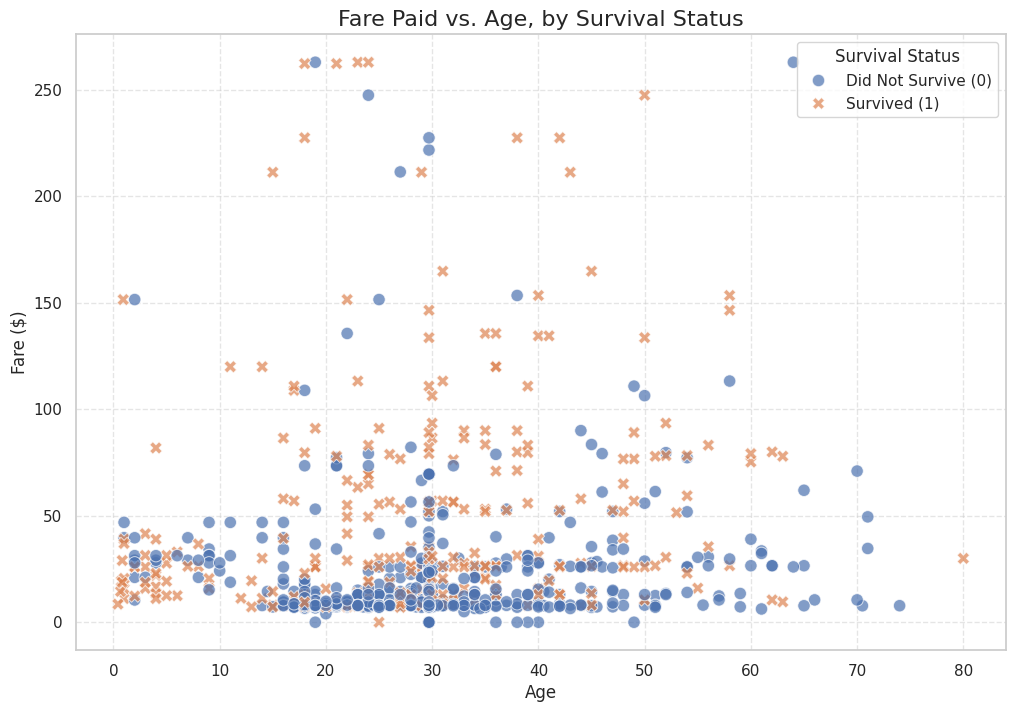

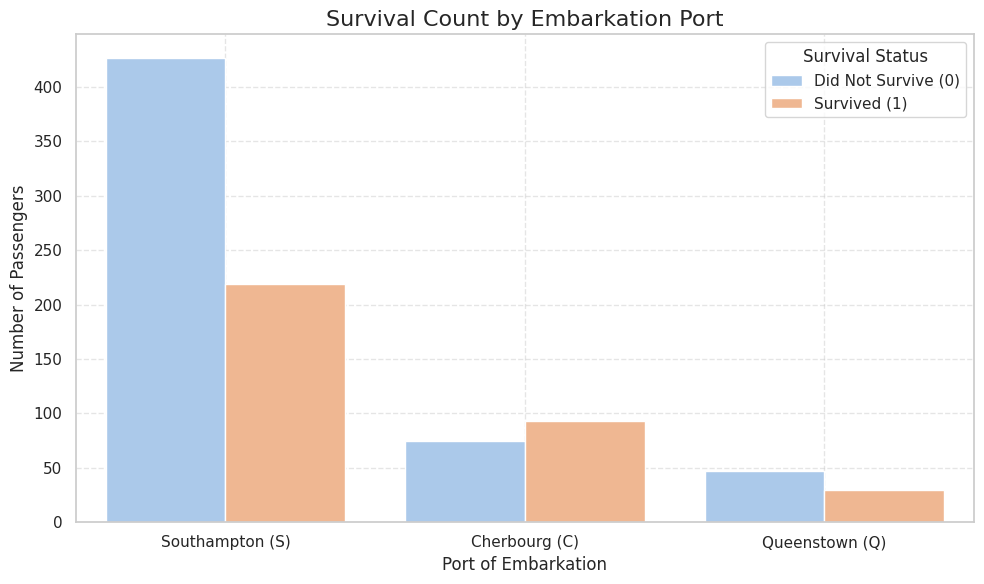

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data():
    """
    Loads the built-in Titanic dataset from Seaborn.
    """
    try:
        print("Loading built-in Titanic dataset from Seaborn...")
        # 'load_dataset' automatically fetches the data
        df = sns.load_dataset('titanic')
        print("Data loaded successfully.")

        # --- Data Cleaning ---
        # Fill missing 'age' values with the mean age
        mean_age = df['age'].mean()
        df['age'] = df['age'].fillna(mean_age)

        # Fill missing 'embarked' values with the most common port
        mode_embarked = df['embarked'].mode()[0]
        df['embarked'] = df['embarked'].fillna(mode_embarked)

        # 'deck' has too many missing values, so we'll drop it
        df = df.drop(columns=['deck'])

        print(f"Loaded and cleaned {len(df)} passenger records.")
        print("\nData Sample (first 5 rows):")
        print(df.head())
        return df

    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")
        return None

def plot_survival_by_class_sex(df):
    """
    Plot 1: Survival Rate by Passenger Class and Sex.
    This plot clearly shows "Women and children first" and class privilege.
    """
    print("Generating Plot 1: Survival Rate by Class and Sex...")

    # Use 'catplot' (a bar plot) to show the mean of 'survived' (0 or 1)
    g = sns.catplot(
        data=df,
        x='pclass',
        y='survived',
        hue='sex',
        kind='bar',
        palette='muted',
        height=6,
        aspect=1.5
    )

    g.fig.suptitle('Survival Rate by Passenger Class and Sex', y=1.03, fontsize=16)
    g.set_axis_labels('Passenger Class (Pclass)', 'Survival Rate')
    g.legend.set_title('Sex')
    # Set custom x-tick labels
    plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])

def plot_age_distribution(df):
    """
    Plot 2: Age Distribution of Passengers (by Survival).
    Compares the age of those who survived vs. those who did not.
    """
    print("Generating Plot 2: Age Distribution by Survival...")
    plt.figure(figsize=(12, 7))

    # Plot two histograms on top of each other with KDE
    sns.histplot(data=df, x='age', hue='survived', multiple='stack', kde=True, bins=30)

    plt.title('Age Distribution by Survival Status', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Number of Passengers', fontsize=12)
    # Manually adjust legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Did Not Survive (0)', 'Survived (1)'], title='Survival Status')

def plot_fare_vs_age(df):
    """
    Plot 3: Fare vs. Age by Survival.
    Shows the relationship between what passengers paid, their age, and survival.
    """
    print("Generating Plot 3: Fare vs. Age...")
    plt.figure(figsize=(12, 8))

    # We'll filter out the extreme fare outliers (like $500+) for a clearer plot
    df_filtered = df[df['fare'] < 300]

    sns.scatterplot(
        data=df_filtered,
        x='age',
        y='fare',
        hue='survived',
        style='survived',
        alpha=0.7,
        s=80
    )

    plt.title('Fare Paid vs. Age, by Survival Status', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Fare ($)', fontsize=12)
    # Manually adjust legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Did Not Survive (0)', 'Survived (1)'], title='Survival Status')
    plt.grid(True, linestyle='--', alpha=0.5)

def plot_embark_survival(df):
    """
    Plot 4: Survival Rate by Embarkation Port.
    Compares survival rates for passengers from different ports.
    """
    print("Generating Plot 4: Survival by Embarkation Port...")
    plt.figure(figsize=(10, 6))

    # 'countplot' shows the counts, 'hue' splits it by survival
    sns.countplot(
        data=df,
        x='embarked',
        hue='survived',
        palette='pastel'
    )

    plt.title('Survival Count by Embarkation Port', fontsize=16)
    plt.xlabel('Port of Embarkation', fontsize=12)
    plt.ylabel('Number of Passengers', fontsize=12)
    # Set custom x-tick labels
    plt.xticks(ticks=[0, 1, 2], labels=['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])
    # Manually adjust legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Did Not Survive (0)', 'Survived (1)'], title='Survival Status')
    plt.grid(True, linestyle='--', alpha=0.5)


def main():
    """
    Main function to run the analysis.
    """
    sns.set_theme(style="whitegrid")

    df = load_data()

    if df is not None:
        # --- Create all plots ---
        plot_survival_by_class_sex(df)
        plot_age_distribution(df)
        plot_fare_vs_age(df)
        plot_embark_survival(df)

        # --- Show all plots ---
        print("\nDisplaying all plots... Close the plot windows to exit.")
        plt.tight_layout() # Adjust plots to prevent overlap
        plt.show()
    else:
        print("Could not analyze data due to loading error.")

if __name__ == "__main__":
    main()

